<a href="https://colab.research.google.com/github/dalatorrem/Diplomado_Metodos_UCentral_2023/blob/main/Lectura_23_Linear_Regression_Part_I_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

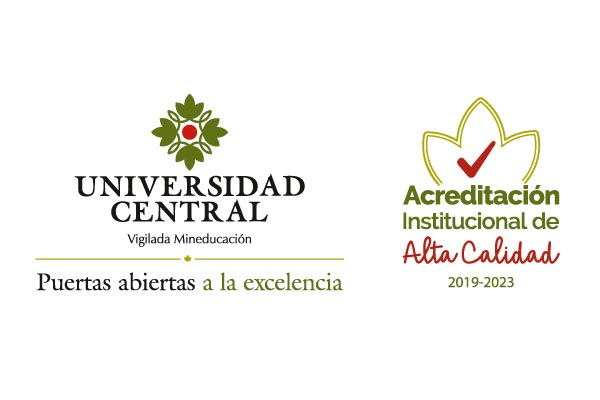

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from   scipy import stats
##
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
##
url_base= "https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/data/"

## ***Objetivos.***

Una comprensión básica de las estadísticas necesarias para la regresión lineal simple, luego introduciremos la regresión lineal comenzando con 2 parámetros. Se espera que se comprendan a fondo los componentes funcionales de un modelo de regresión lineal, como interpretar los coeficientes y comprender varias métricas para evaluar correctamente el rendimiento del modelo.

## ***¿Qué factores están impulsando la discriminación salarial entre hombres y mujeres en la empresa?***


## ***Introducción.***

**Contexto empresarial**. Su empresa está pasando por una revisión interna de sus prácticas de contratación y compensación a los empleados. En los últimos años, su empresa ha tenido poco éxito en la conversión de candidatas de alta calidad que deseaba contratar. La gerencia plantea la hipótesis de que esto se debe a una posible discriminación salarial y quiere averiguar qué la está causando.

**Problema empresarial.** Como parte de la revisión interna, el departamento de recursos humanos se ha acercado a usted para investigar específicamente la siguiente pregunta: **"En general, ¿se les paga más a los hombres que a las mujeres en su empresa? Si es así, ¿qué está impulsando esta brecha?"**

**Contexto analítico**. El departamento de recursos humanos le ha proporcionado información de empleados que contiene información sobre varios atributos como desempeño, educación, ingresos, antigüedad, etc. Usaremos técnicas de regresión lineal en este conjunto de datos para resolver el problema comercial descrito anteriormente. Veremos cómo la regresión lineal cuantifica la correlación entre la variable objetivo (`target`) y las variables de entrada (`features`) (por ejemplo, educación, ingresos, antigüedad, etc.)



In [ ]:
df = pd.read_csv(url_base + "dataset_company.csv")
df.head()

,job_title,age_years,performance_score,education,seniority_years,pay_yearly,male_female
0,Project Manager,34,33.33,High School,4,118503,M
1,Marketing associate,66,16.67,High School,3,129393,M
2,Marketing associate,51,50.00,Masters,8,139440,M
3,Sales representative,26,16.67,Masters,3,118191,F
4,Account executive,36,50.00,PhD,4,77717,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          463 non-null    object 
 1   age_years          463 non-null    int64  
 2   performance_score  463 non-null    float64
 3   education          463 non-null    object 
 4   seniority_years    463 non-null    int64  
 5   pay_yearly         463 non-null    int64  
 6   male_female        463 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 25.4+ KB


Las variables son:

1. **job_title**: Cargo que ocupa (p.j. “Graphic Designer”, “Software Engineer”, etc)
2. **age_years**: Edad
3. **performance_score**: Puntaje en escala de 0 a 100, siendo 0 el más bajo y 100 el más alto.
4. **education**: Nivel máximo de educación (p.j. "College", "PhD", "Masters", "Highschool")
5. **seniority_years**: Años de antigüedad
6. **pay_yearly**: Pago anual en dólares.
7. **male_female**: Género: hombre o mujer.

In [ ]:
df.select_dtypes("object")

In [ ]:
for column in df.select_dtypes("object").columns:
  print(column,":",df[column].unique())
  print("="*80)

job_title : ['Project Manager' 'Marketing associate' 'Sales representative'
 'Account executive' 'Dog trainer' 'Web Designer']
education : ['High School' 'Masters' 'PhD' 'College']
male_female : ['M' 'F']


In [ ]:
df["male_female"].value_counts()#normalize = True)

M    241
F    222
Name: male_female, dtype: int64

Hay 241 hombres y 222 mujeres en este conjunto de datos, para un total de 463 personas.

####  ***Ejercicio 1.***

##### 1.1

Este es un diagrama de caja que compara el salario entre hombres y mujeres. ¿Qué puedes concluir?

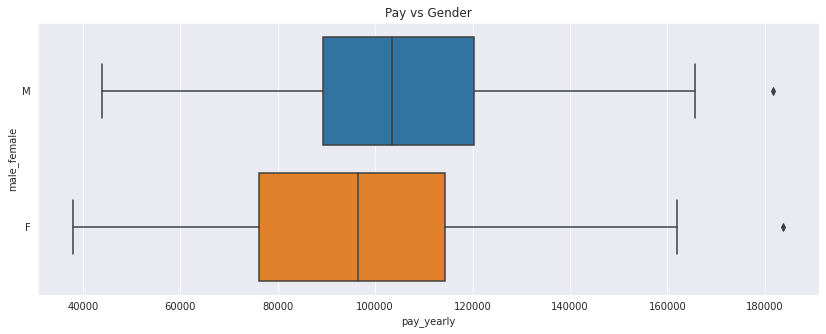

In [ ]:
plt.figure(figsize=(14,5))
sns.boxplot(y = "male_female", x = "pay_yearly", data=df)
plt.title("Pay vs Gender")
plt.show()

***Respuesta.***

##### 1.2

Realice una prueba $t$ - sobre la diferencia en el salario promedio, dado el $p$-valor que puede concluir.

In [ ]:
## Hint: use de scipy.stats ttest_ind
t2, p2 = stats.ttest_ind(df.loc[df["male_female"] == "M", "pay_yearly"],
                         df.loc[df["male_female"] == "F", "pay_yearly"])
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.159137006700065
p = 0.00168638900645661


***Respuesta.***



##### 1.3

Inspeccione la gráfica de dispersión a continuación:

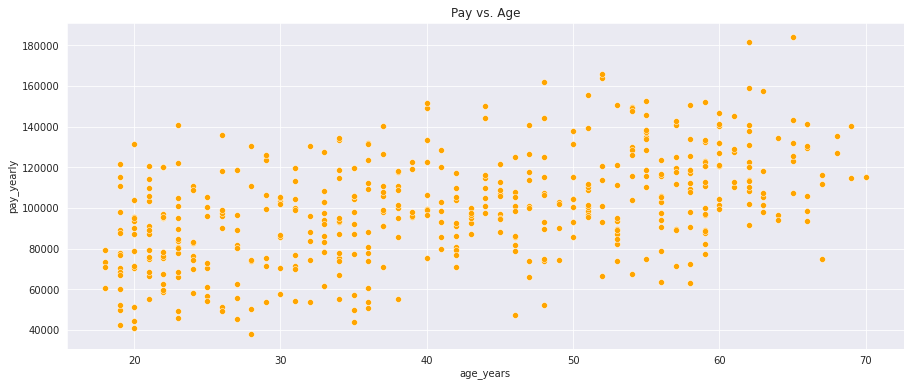

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data = df, x = "age_years", y = "pay_yearly", color="orange",)
plt.title("Pay vs. Age")
plt.show()

y los box-plots de la varible `pay_yearly` con respecto a las siguientes `features`: `seniority_years`, `education`, `job_title`, and `performance_score`. ¿Qué patrones observas?

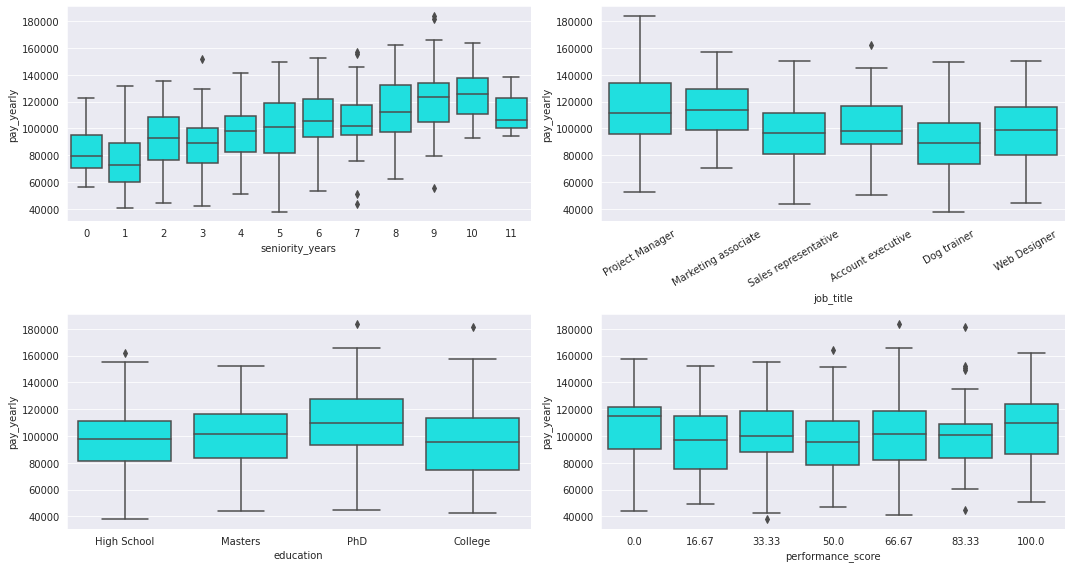

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (15,8))
##
sns.boxplot(data = df, y = "pay_yearly", x = "education", color = "cyan", ax = ax[1,0])
sns.boxplot(data = df, y = "pay_yearly", x = "performance_score", color = "cyan", ax = ax[1,1])
sns.boxplot(data = df, y = "pay_yearly", x = "seniority_years", color = "cyan",ax = ax[0,0])
g = sns.boxplot(data = df, y = "pay_yearly", x = "job_title", color = "cyan", ax = ax[0,1])
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
fig.tight_layout()                          ## Quita el sobrepuesto de las etiquetas de las gráficas
plt.show()

***Respuesta.***



#### ***Ejercicio 2.***

Ahora, hagamos las mismas gráficas que en el Ejercicio 1.3, pero diferenciándolas adicionalmente por género. ¿Qué patrones observas?


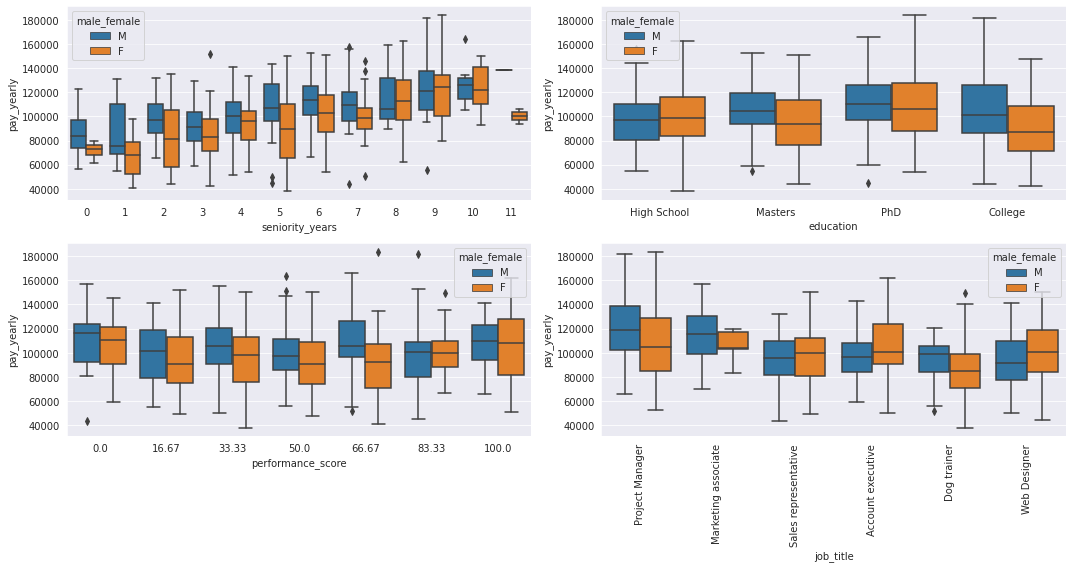

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (15,8))
sns.boxplot(data = df, y = "pay_yearly", x = "seniority_years", hue = "male_female",ax = ax[0,0])
#
sns.boxplot(data = df, y = "pay_yearly", x = "education", hue = "male_female", ax = ax[0,1])
#
sns.boxplot(data = df, y = "pay_yearly", x = "performance_score", hue = "male_female", ax = ax[1,0])
#
g = sns.boxplot(data = df, y = "pay_yearly", x = "job_title", hue = "male_female", ax = ax[1,1])
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
fig.tight_layout()
plt.show()

***Respuesta.***

#### ***Ejercicio 3.***

¿Cual de los siguientes enunciados son verdaderos?
<ul>
I. El salario promedio de los hombres es alrededor de USD $7500$ más que el de las mujeres en esta organización.
<br>
II. A los hombres se les paga significativamente más que a las mujeres debido únicamente a las diferencias de género.<br>
</ul>

In [ ]:
df.groupby("male_female")["pay_yearly"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
male_female,,,,,,,,
F,222.0,96255.95,26971.22,38006.0,76199.75,96413.5,114349.25,183827.0
M,241.0,103821.54,24558.90,43848.0,89361.00,103432.0,120357.00,181662.0


***Respuesta.***



## ***¿Cuáles son las variables que influyen en la remuneración?***

En los ejercicios anteriores vimos el EDA, aunque existe una brecha salarial significativa entre los géneros, también hay otros factores en el trabajo que impulsan esta diferencia. Por lo tanto, ignorar estos factores al abordar la discriminación salarial podría conducir a conclusiones erróneas o engañosas.

¿Cómo tomamos en cuenta la influencia de las otras variables en el salario? ¿Cuáles son estas variables? Un buen lugar para comenzar es el EDA anterior. La única variable numérica en este conjunto de datos es la edad, así que revisemos de nuevo nuestro gráfico de dispersión de salario frente a la edad:

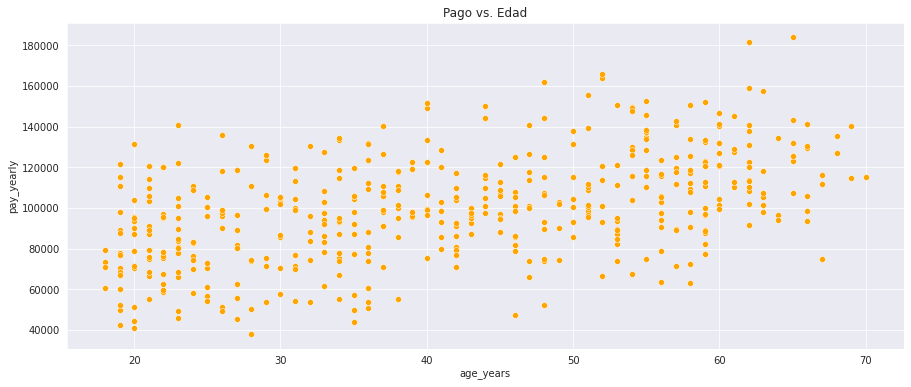

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data = df, x = "age_years", y = "pay_yearly", color="orange")
plt.title("Pago vs. Edad")
plt.show()

El pago parece estar correlacionado positivamente con la edad; es decir, cuanto mayor es alguien, más tiende a cobrar. Por lo tanto, podría darse el caso de que haya más hombres en nuestro conjunto de datos que sean mayores y la diferencia salarial entre hombres y mujeres que vemos podría ser una consecuencia de esto.

#### ***Ejercicio 4.***

Detemine si es verdadera o falsa la siguiente afirmación y explique por qué:

"Si la correlación de Pearson entre dos variables es cero, entonces las dos variables no están relacionadas"

***Respuesta.***



Para encontrar las variables que tienen la mayor influencia en el pago, podemos calcular una matriz de correlación y trazarla como un mapa de calor:



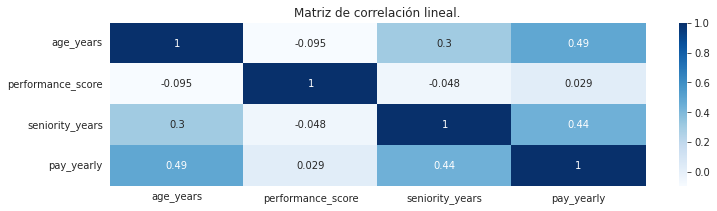

In [ ]:
plt.figure(figsize = (12,3))
corr_mat = df.select_dtypes("number").corr()
sns.heatmap(corr_mat, cmap="Blues", annot=True)
plt.title("Matriz de correlación lineal.")
plt.show()

Parece que las dos variables que se relacionan linealmente con la remuneración son `age_years` y `seniority_years`. Debemos asegurarnos de incluirlos en nuestro modelo.

## ***Uso de modelos lineales para tener en cuenta las variables correlacionadas con el pago***

Una vez que identificamos algunas variables que están correlacionadas con la variable de objetivo, podemos usar un modelo lineal para capturar esta relación cuantitativamente. Un modelo lineal encuentra la recta de mejor ajuste de los puntos dados.

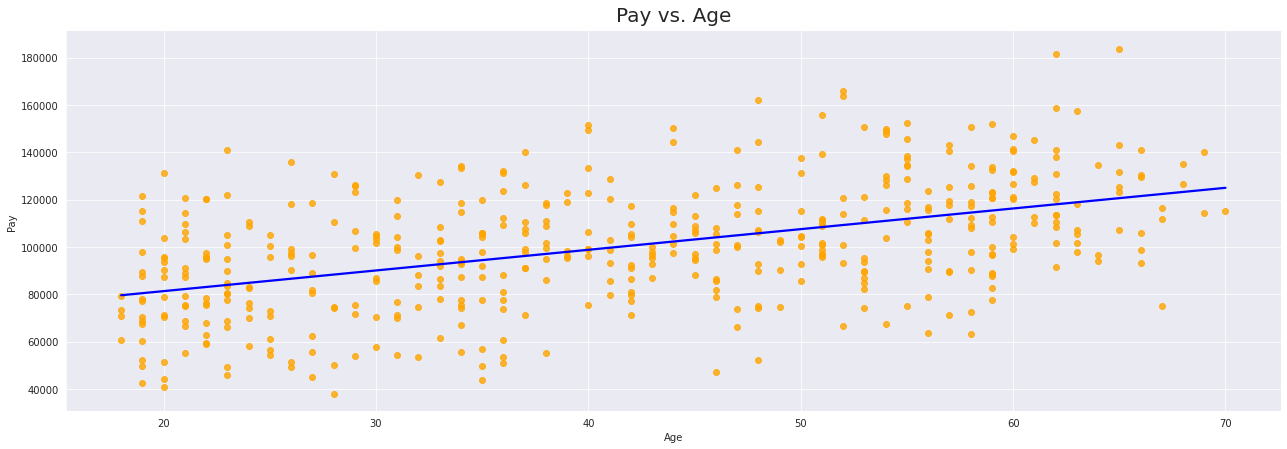

In [ ]:
sns.lmplot(data = df, x="age_years", y="pay_yearly", ci=None, line_kws={"color": "blue"},
           scatter_kws={"color": "orange"},height=6, aspect=3)
plt.title("Pay vs. Age", fontsize=20, verticalalignment="bottom")
plt.xlabel("Age")
plt.ylabel("Pay")
plt.show()

Una recta tiene dos parámetros: intercepto ($\beta_0$) y pendiente ($\beta_1$), también conocidos como los **coeficientes** del modelo. Por lo tanto, un modelo lineal de salario frente a la edad se puede representar como:

$$ PAY{\_}YEARLY = \beta_0 + \beta_1 AGE{\_}YEARS + \varepsilon $$



## ***Interpretando la salida de un modelo lineal.***


La línea recta que dibujamos en el diagrama de dispersión de pago vs. edad se ajustó usando un modelo estadístico llamado **regresión lineal**, cuyos resultados se pueden ver a continuación:

In [ ]:
## Modelo de regresión lineal simple.
formula1 = "pay_yearly ~ age_years"
model1 = smf.ols(formula = formula1, data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             pay_yearly   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           5.00e-29
Time:                        18:00:23   Log-Likelihood:                -5300.3
No. Observations:                 463   AIC:                         1.060e+04
Df Residuals:                     461   BIC:                         1.061e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.384e+04   3209.744     19.891      0.0

La tabla de salida anterior contiene mucha información, solo debemos centrarnos en una pequeña cantidad de cantidades. Estas son la variable de salida (también conocida como la **variable dependiente**), $R^2$ y los coeficientes (las estimaciones de $\beta_0$ y $\beta_1$) y sus $p$-valores.

### ***Coeficientes.***

El intercepto $\beta_0$ es de aproximadamente USD $\$63 840.$ Esto se puede considerar como el salario base; es decir, el salario esperado de una persona de edad cero. Con frecuencia, el intercepto no tiene una interpretación significativa (como en este caso), eso está bien siempre que lo reconozcamos y tengamos una explicación sólida de por qué. La pendiente (el coeficiente $\beta_1$ para `age_years`) es USD $\$873,50$. La interpretación de este coeficiente es:

***Si un empleado aumenta un año su edad, se espera que su salario aumente en USD $\$ 873,50$ en promedio.***

Las variables de entrada como la `age_years` también se denominan **variables independientes** en el contexto de un modelo de regresión lineal.

### ***$R^{2}$***

Para el modelo de pago versus edad, $R^2 = 0.238$. Dado que este modelo solo explica alrededor del 23,8% de la variación, esto nos motiva a investigar si se pueden utilizar otros factores además de la edad para explicar las diferencias salariales y así mejorar nuestras predicciones.

Un hecho matemático importante a tener en cuenta es que cuando tratamos con relaciones de dos variables, $R^2 \equiv \rho^2$, donde $\rho$ (rho) es el coeficiente de correlación. En el diagrama de dispersión de salario frente a edad, el coeficiente de correlación $\rho$ fue 0,4876 y, por lo tanto, $R^2=0,4876^2=0,238$. De esto se deduce que *cuanto más fuerte sea la correlación lineal entre dos variables, mejor será la bondad de ajuste de la regresión lineal correspondiente*.

Hay muchas líneas posibles que podemos ajustar a nuestros datos, pero como dijimos antes, la que queremos es la línea de mejor ajuste, que se define como la línea (entre todas las líneas posibles) que maximiza el $R^2$. del modelo.

## ***En cuanto a la edad y el género.***

Ahora que hemos visto que la edad explica parte de la relación con el salario, consideremos un modelo en el que tengamos en cuenta la edad y el género simultáneamente. Pasaremos de ajustar una [**regresión lineal simple**](https://en.wikipedia.org/wiki/Simple_linear_regression) (una variable independiente, una variable dependiente) a ajustar una [**regresión lineal múltiple** ](https://www.investopedia.com/terms/m/mlr.asp) (varias variables independientes, una variable dependiente).

Las regresiones lineales pueden involucrar variables categóricas tan fácilmente como las variables numéricas. El truco consiste en codificar las categorías como números para que el modelo pueda interpretarlas. Hay muchas formas de codificar variables categóricas, pero una de los más comunes es transformarlos en conjuntos de unos y ceros. Lo importante es tener en cuenta la forma en que interpretamos los coeficientes de las variables categóricas en un modelo lineal que es ligeramente diferente a la de las variables numéricas:

In [ ]:
temp = pd.get_dummies(df["male_female"], drop_first=True)
pd.concat([temp,df["male_female"]], axis = 1)

,M,male_female
0,1,M
1,1,M
2,1,M
3,0,F
4,1,M
...,...,...
458,1,M
459,0,F
460,0,F
461,0,F


In [ ]:
## Modelo con solo la variable male_female
model_MF = smf.ols("pay_yearly ~ male_female", data = df)
fitted_MF = model_MF.fit()
print(fitted_MF.summary())

                            OLS Regression Results                            
Dep. Variable:             pay_yearly   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.980
Date:                Sat, 29 Oct 2022   Prob (F-statistic):            0.00169
Time:                        18:13:00   Log-Likelihood:                -5358.2
No. Observations:                 463   AIC:                         1.072e+04
Df Residuals:                     461   BIC:                         1.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.626e+04   1727.795  

$$ PAY{\_}YEARLY = \beta_0 + \beta_1{MALE{\_}FEMALE}\text{[T.M]}$$

In [ ]:
media_F, media_M = 96255.95, 96255.95 +7565.5893
print("Media salarial de las mujeres:", media_F)
print("Media salarial de las hombres:", media_M)
print("Diferencia salarial promedio:", media_M - media_F)

Media salarial de las mujeres: 96255.95
Media salarial de las hombres: 103821.5393
Diferencia salarial promedio: 7565.589300000007


In [ ]:
df.groupby("male_female")["pay_yearly"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
male_female,,,,,,,,
F,222.0,96255.95,26971.22,38006.0,76199.75,96413.5,114349.25,183827.0
M,241.0,103821.54,24558.90,43848.0,89361.00,103432.0,120357.00,181662.0


$$ PAY{\_}YEARLY = \beta_0 + \beta_1 AGE{\_}YEARS + \beta_2 {MALE{\_}FEMALE}\text{[T.M]} + \varepsilon $$


In [ ]:
## Modelo de regresión lineal múltiple.
formula2 = "pay_yearly ~ age_years + male_female"
model2 = smf.ols(formula = formula2, data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             pay_yearly   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     79.99
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.54e-30
Time:                        18:21:42   Log-Likelihood:                -5294.0
No. Observations:                 463   AIC:                         1.059e+04
Df Residuals:                     460   BIC:                         1.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.006e+04   3344.884  

La interpretación del coeficiente de edad es similar a la anterior:

***Dentro de los grupos del mismo sexo, si la edad aumenta en un año, se espera que el salario aumente USD $\$ 872$***

Observe que este valor es diferente del que obtuvimos en el anterior regresión: esto se debe a que la variabilidad presente en `pay_yearly` ahora tiene que dividirse entre más variables explicativas.



Con respecto al coeficiente de la variable `male_female`. Muestra masculino (`T.M`) solamente, porque la categoría femenina se toma como categoría predeterminada (o referencia). Eso significa que el coeficiente representa el `pay_yearly` adicional o reducido que ocurre solo porque alguien es hombre en lugar de mujer. En última instancia, la elección de la categoría predeterminada no importa: podríamos haber optado fácilmente por hacer de masculino la categoría predeterminada y, por lo tanto, el coeficiente de género sería `T.F`. El coeficiente $\$7398$ se interpreta de la siguiente manera:

***Para empleados de la MISMA EDAD, los hombres en promedio ganan \\$7,398 USD más que las mujeres.***

---



Aún no hemos contestado la pregunta principal. Solo hemos tenido en cuenta la edad además del género para explicar las brechas salariales. Todavía hay algunos factores más que podrían afectar el pago. Consideramos `education` como una nueva varible explicativa. El siguiente gráfico muestra que a los empleados con un doctorado se les paga más:

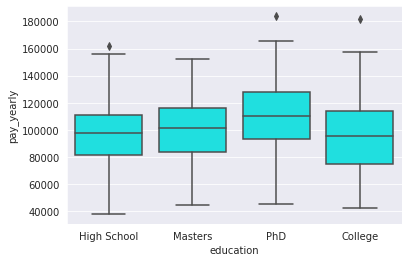

In [ ]:
sns.boxplot(data = df, y = "pay_yearly", x = "education", color = "cyan")
plt.show()

#### ***Ejercicio 5.***

Haga un regresión múltiple de la forma:

$$
PAY{\_}YEARLY = \beta_0 + \beta_1 AGE{\_}YEARS + \beta_2 {MALE{\_}FEMALE} + \beta_3 EDUCATION + \varepsilon
$$

Además, compare el $R^2$ ajustado con el del modelo anterior. ¿Qué conclusiones puede sacar?

In [ ]:
## Celda de código para probar.
formula3 = "pay_yearly ~ age_years + male_female+education "
model3 = smf.ols(formula = formula3, data = df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             pay_yearly   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     37.38
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           3.93e-32
Time:                        18:42:35   Log-Likelihood:                -5283.8
No. Observations:                 463   AIC:                         1.058e+04
Df Residuals:                     457   BIC:                         1.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

***Respuesta.***





#### ***Ejercicio 6.***

¿Cuál de las siguientes afirmaciones es verdadera con respecto al modelo anterior? Seleccione todas las que correspondan.


I. Después de tener en cuenta la edad y el sexo, los empleados con `collague education` ganan en promedio  $\$11560$  USD menos que los que tienen un doctorado.

II. Después de tener en cuenta la edad y el género, a los empleados con `Masters` se les paga en promedio USD $\$4891$ más que a aquellos que solo tienen un título de `collegue`.

***Respuesta.***



## ***Modelo integrado que contabiliza todas las variables.***

Consideremos todos los demás factores que podrían explicar las brechas salariales a la vez. Agregar `job_title`, `performance_score` y `seniority_years`:

In [ ]:
formula4 = '''pay_yearly ~ age_years + job_title + education + male_female +
              performance_score + seniority_years
            '''
model4 = smf.ols(formula = formula4, data = df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             pay_yearly   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     38.41
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           2.11e-61
Time:                        18:48:19   Log-Likelihood:                -5199.9
No. Observations:                 463   AIC:                         1.043e+04
Df Residuals:                     450   BIC:                         1.048e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#### ***Ejercicio 7.***

Teniendo en cuenta todos los factores, ¿cuál de los siguientes trabajos paga más?

A. `Marketing associate`.

B. `Sales representative`.

C. `Proyect Manager`.

D. `Web Designer`.

***Respuesta.***.



## ***La pregunta de la discriminación salarial...***

Ahora que hemos analizado y tenido en cuenta varios atributos que están correlacionados con el salario, volvamos a examinar la cuestión de qué está impulsando la discriminación salarial. Nuestro último modelo, que tiene en cuenta todas las variables del conjunto de datos, tiene un $R$ al cuadrado del 50,6 %. Esta es definitivamente una gran mejora con respecto al modelo simplista (pago versus edad) que tenía un $R$ al cuadrado de 23,8%.

### ***Ejercicio 9.***

Según el análisis que hemos hecho hasta ahora, ¿cuál de las siguientes afirmaciones es correcta? Seleccione todas las que correspondan.


I. Después de tener en cuenta el cargo, la educación, el desempeño y la edad, la proporción de la diferencia salarial atribuible únicamente al género es pequeña.

II. Existe evidencia de que la discriminación salarial entre hombres y mujeres se debe únicamente al género.

III. Hay razones para creer que podría haber una cantidad desproporcionada de mujeres en trabajos peor pagados, mientras que podría haber más hombres en trabajos mejor pagados, como `Proyect Manager` o `Marketing associate`.

***Respuesta.***



## ***Investigar la distribución de género a través de la antigüedad y los tipos de trabajo.***

Motivados por el ejercicio anterior, veamos cómo se distribuyen las mujeres en varios factores. El siguiente gráfico muestra que hombres y mujeres están distribuidos de manera similar por antigüedad:

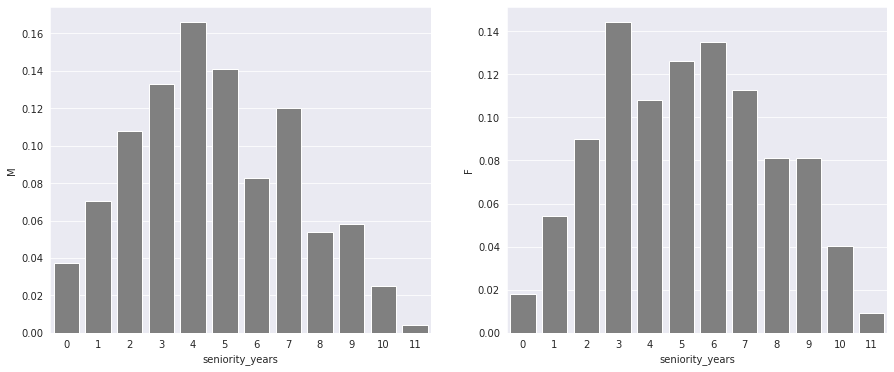

In [ ]:
ct = pd.crosstab(df["male_female"], df["seniority_years"], normalize="index")
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.barplot(x = ct.columns, y = ct.loc["M"], ax = ax[0], color = "grey")
sns.barplot(x = ct.columns, y = ct.loc["F"], ax = ax[1], color = "grey")
plt.show()

Sin embargo, observar la distribución de las mujeres en varios roles de trabajo:

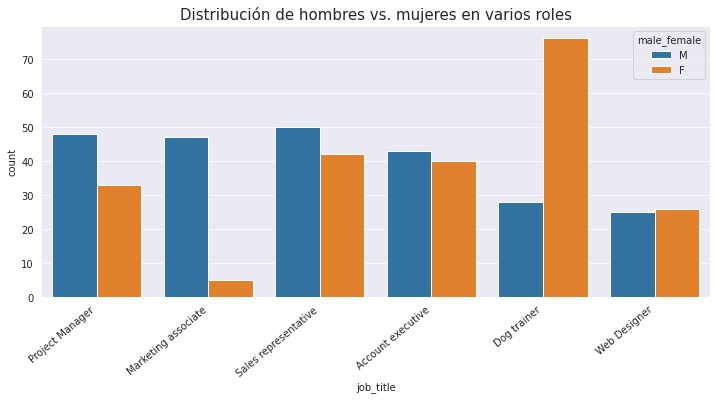

In [ ]:
plt.figure(figsize = (12,5))
g = sns.countplot(data = df, x="job_title", hue="male_female")
g.set_title("Distribución de hombres vs. mujeres en varios roles", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(),rotation = 40, ha = "right")
plt.show()

Se observa que:

1. Las mujeres están subrepresentadas en los roles de `Project Manager` y `Marketing associate`.

2. Las mujeres están desproporcionadamente sobrerrepresentadas en el trabajo de `Dog trainer` que es el de peor pago.

## ***Conclusiones.***

Utilizamos las técnicas de regresión lineal para determinar si existía o no discriminación salarial basada en el género dentro de su organización. Modelamos el efecto de varias variables de entrada (en este caso, antigüedad, edad, desempeño y cargo) para explicar la variación observada de una variable de salida (en este caso, salario). Observamos el coeficiente $R^2$ de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en el salario se explica por las variables de entrada.

Vimos que la diferencia en el salario medio entre hombres y mujeres es estadísticamente significativa. Una exploración más profunda de los datos sugirió que un gran impulsor de esta diferencia se debía a que las mujeres estaban sobrerrepresentadas en los trabajos peor pagados y subrepresentadas en los trabajos mejor pagados.

Por lo tanto, se justifica una investigación sobre las prácticas de contratación, promoción y colocación laboral de hombres y mujeres. En su informe al departamento de recursos humanos, debe pedirles que examinen las siguientes preguntas:

1. ¿Las mujeres eligen o se ven obligadas a aceptar trabajos con salarios más bajos?
2. ¿Se discrimina a las mujeres en los procesos de contratación para trabajos mejor remunerados?

## ***Comentarios.***

En esta lectura se aprendió a aprovechar el análisis exploratorio de datos (EDA) para construir un modelo lineal eficaz que tuviera en cuenta varios factores relacionados con el resultado de interés (pago).

Resumiendo:

1. Se aprendió que al observar la relación entre el resultado de interés y la variable de entrada de interés no es suficiente; puede haber varias variables de confusión.
2. Es importante realizar EDA antes de construir cualquier modelo para descubrir y tener en cuenta estas variables de confusión que podrían estar impulsando la variación en el resultado de interés.
3. $R^2$ es una cantidad importante que explica qué tan bien su modelo explica la variación observada. Se puede utilizar para comparar diferentes modelos.
4. Es extremadamente importante analizar los coeficientes de una regresión lineal para comprender cómo los diversos parámetros impactan en el resultado final; esta interpretabilidad es una parte clave de la traducción de datos en acciones comerciales.


## ***Créditos.***

"R2values.svg", 6 de abril de 2018, Debenben, CC BY-SA 4.0, https://de.wikipedia.org/wiki/Datei:R2values.svg

